# Image Recognition

## OpenCV with Python for Image and Video Analysis

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 9. Morphological Transformations 

In [13]:
#Erosion creates a slider (we can mention the size of the slider), and (for eg.) if all the pixels in 1 slide are black and 
#1 is white, it removes that white.
#Dilation on the other hand, pushes that white away.

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('Dilation',dilation)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [15]:
#for colored results, apply take the res and apply mask as erosion
#see the difference yourselves

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= erosion)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)

    cv2.imshow('Original',frame)
    cv2.imshow('res',res)
    cv2.imshow('Erosion',erosion)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [17]:
#Opening & Closing remove stuff from background. Opening removes false positives & Closing removes false negatives.

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
    # It is the difference between input image and Opening of the image
    cv2.imshow('Tophat',tophat)

    # It is the difference between the closing of the input image and input image.
    cv2.imshow('Blackhat',blackhat)

### 14. Feature Matching (Homography) Brute Force

##### ORB (Oriented FAST and Rotated BRIEF)

This algorithm was brought up by Ethan Rublee, Vincent Rabaud, Kurt Konolige and Gary R. Bradski in their paper ORB: An efficient alternative to SIFT or SURF in 2011. As the title says, it is a good alternative to SIFT and SURF in computation cost, matching performance and mainly the patents. Yes, SIFT and SURF are patented and you are supposed to pay them for its use.

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. First it use FAST to find keypoints, then apply Harris corner measure to find top N points among them. It also use pyramid to produce multiscale-features. But one problem is that, FAST doesn’t compute the orientation. So what about rotation invariance? Authors came up with following modification.

FAST: https://docs.opencv.org/master/df/d0c/tutorial_py_fast.html

BRIEF: https://docs.opencv.org/master/dc/d7d/tutorial_py_brief.html

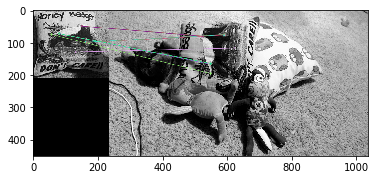

In [8]:
img1 = cv2.imread('img7.jpg',0)
img2 = cv2.imread('img8.jpg',0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

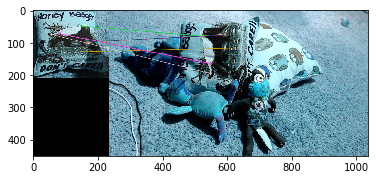

In [9]:
img1 = cv2.imread('img7.jpg',1)
img2 = cv2.imread('img8.jpg',1)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

### 15. MOG Background Reduction

In [2]:
cap = cv2.VideoCapture('people-walking.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.destroyAllWindows()